# Preliminary Questions:

### What is the purpose of splitting your data into training, validation and test sets?

Training data will allow us to build up the model
Validation set will allow us to take the model and tune it, for example setting parameters on regularsation lamda
Test data set will allows us to check that the model performs well on a dataset that it has not seen before. The training set should follow the same general distribution of the training set

### What is the cost function for linear regression? 

J(theta) = 1/2m SUM( (predicted-Y - Y )^2  )
where predicted-y = Theta0 + Theta1X1 + Theta2X2 ...

### How would you modify the cost function for linear regression to use regularisation?

J(theta) = 1/2m SUM( (predicted-Y - Y )^2  + 1/mLamda(SUM (from j=1>m (Thetaj^2)))
Where lamda = Regularisation Parameter
Could use ABS(Thetaj) rather than (ThetaJ)^2 


### How does the size of the regularisation parameter impact your model?

Larger regularisation parameter will mean that the theta parameter weights will be smaller

### What metric should you use to evaluate the accuracy of a linear regression model?

Value of the Minimised cost function

# Data Import And Initial Investigation

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boston = load_boston()

#print(boston)

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000usd
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in 1000usd

In [4]:
y = boston.target
X = boston.data
X.shape
#print(Y)

(506, 13)

In [5]:
data   = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ["TARGET"])

data['TARGET'] = target

data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
target.describe()

,TARGET
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
np.sum(data.isnull(), axis = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

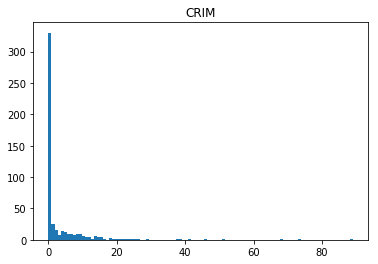

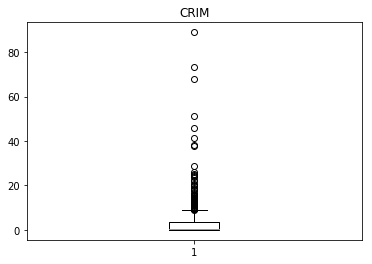

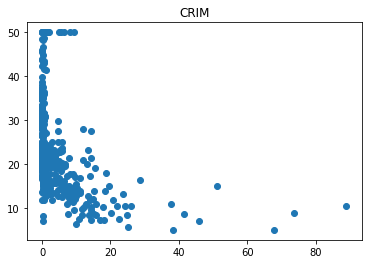

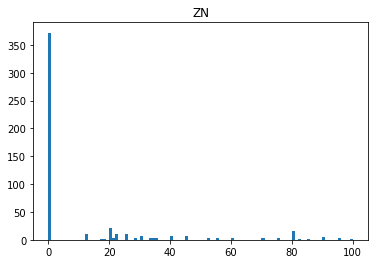

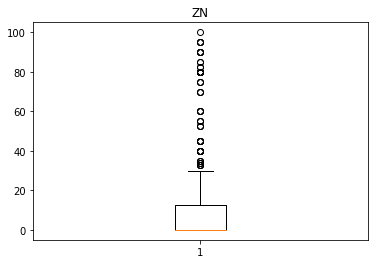

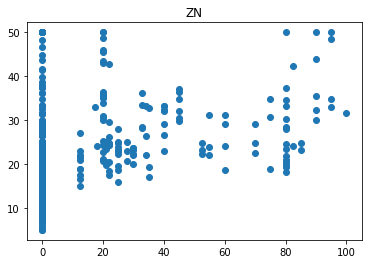

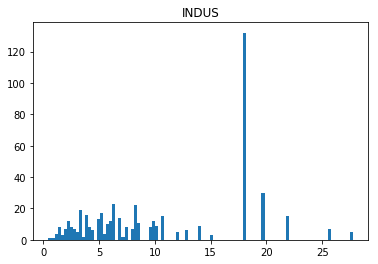

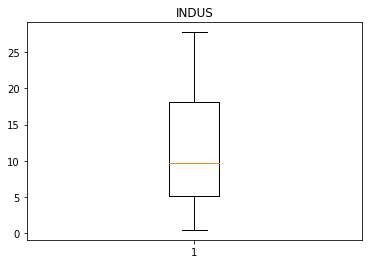

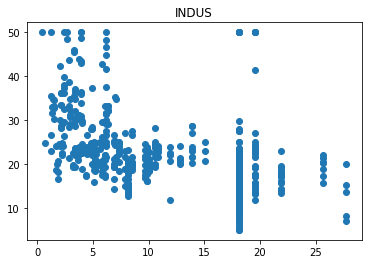

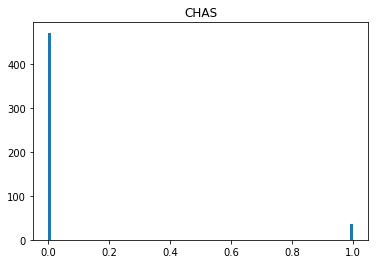

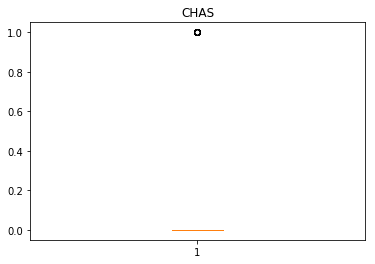

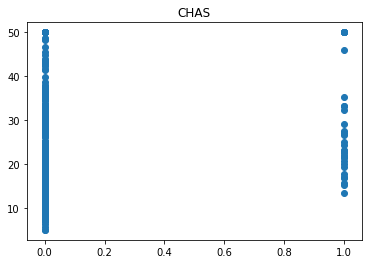

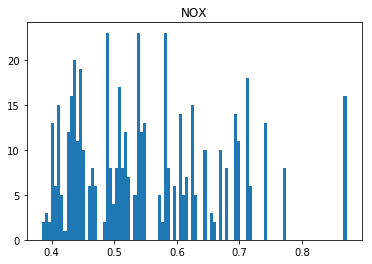

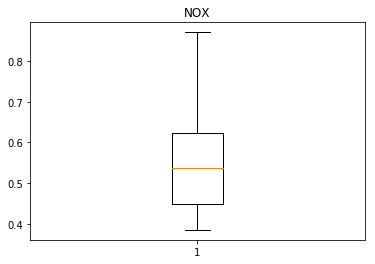

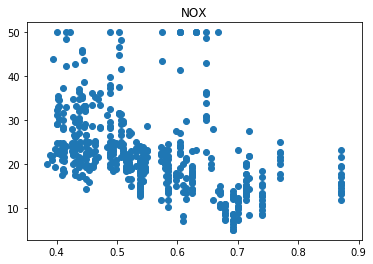

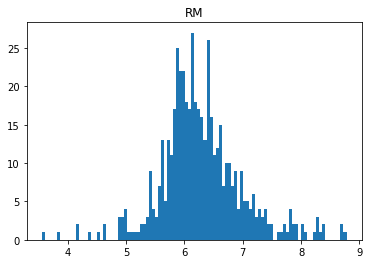

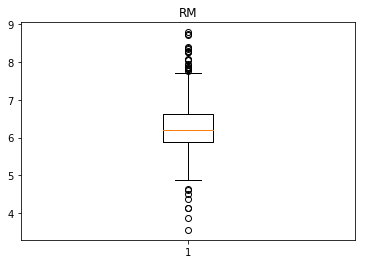

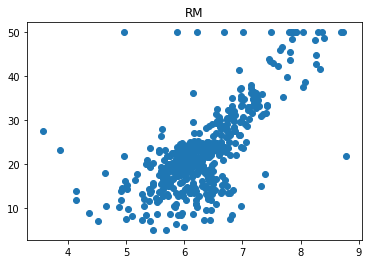

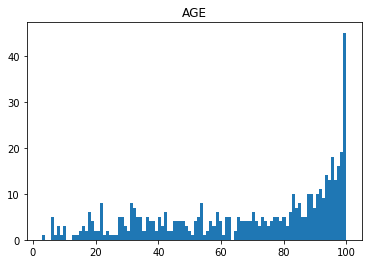

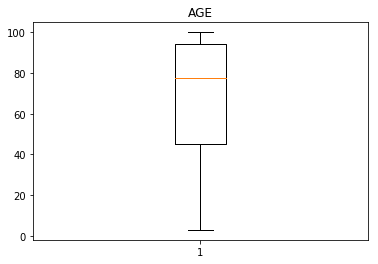

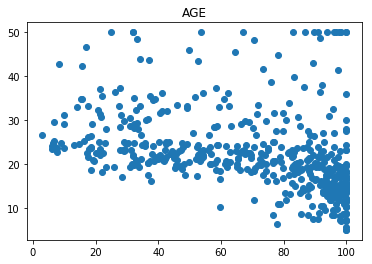

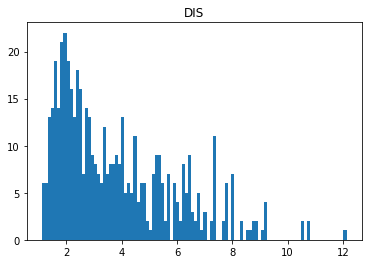

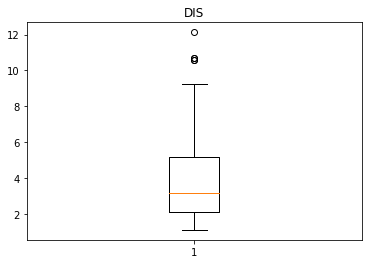

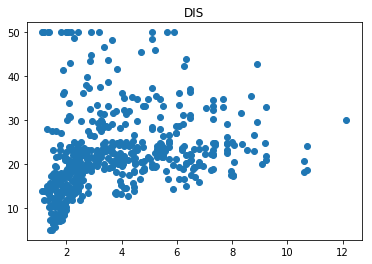

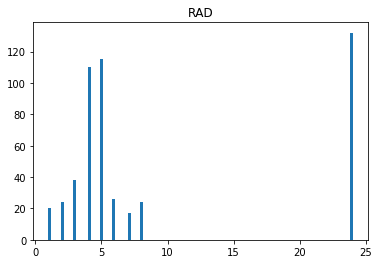

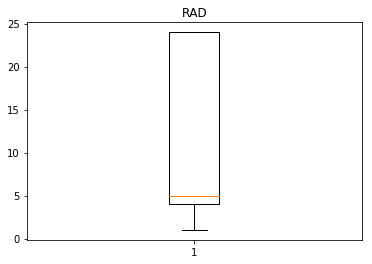

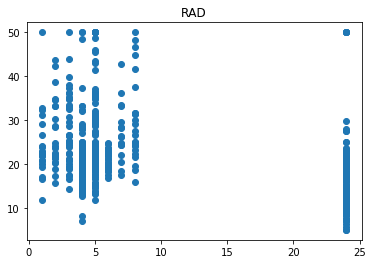

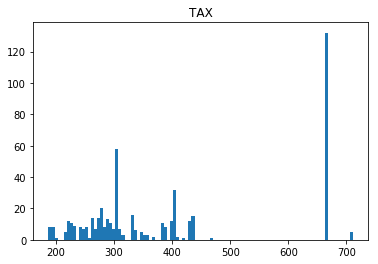

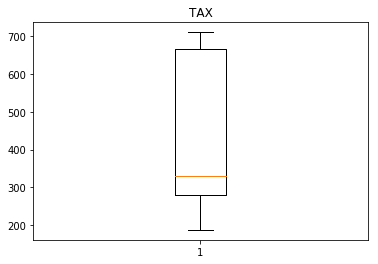

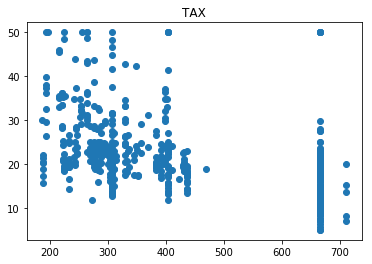

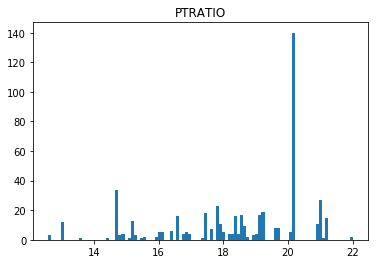

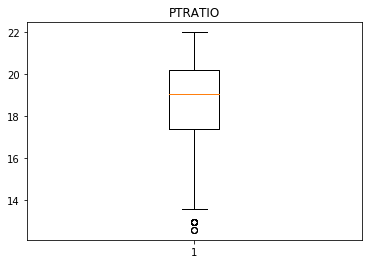

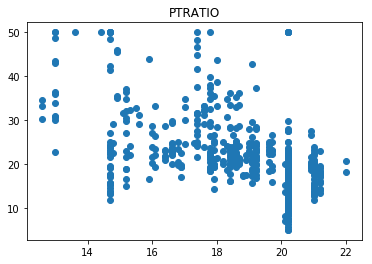

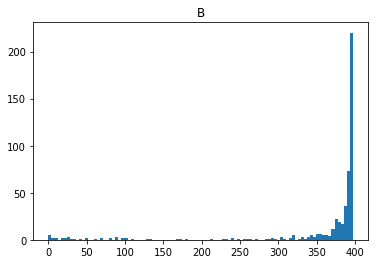

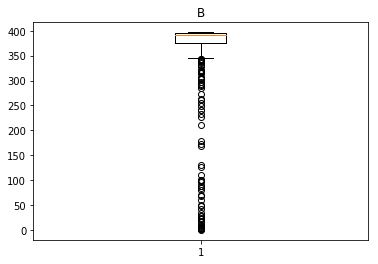

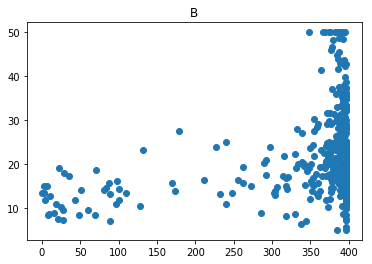

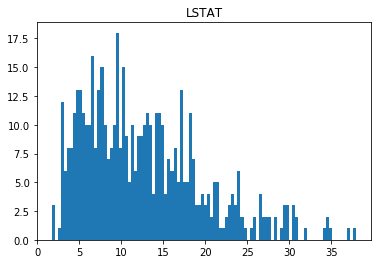

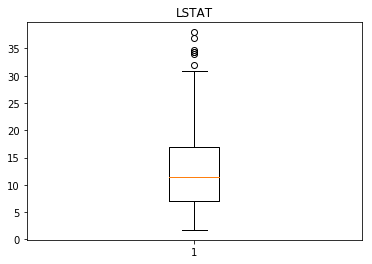

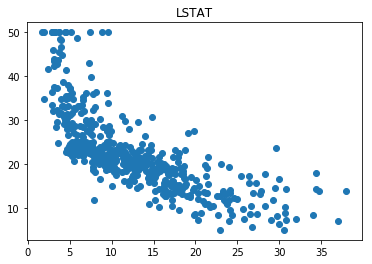

In [9]:
for i in boston.feature_names:
    plt.hist(data[i],bins = 100)
    plt.title(i)
    plt.show()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()
    plt.scatter(data[i], data['TARGET'])
    plt.title(i)
    plt.show()

In [10]:
#for i in boston.feature_names:
#    for j in boston.feature_names:
#        if i == j :
#            print("same")
#        else:
#            plt.scatter(data[i], data[j])
#            plt.title(i+" vs "+j)
#            plt.xlabel(i)
#            plt.ylabel(j)
#            plt.show()

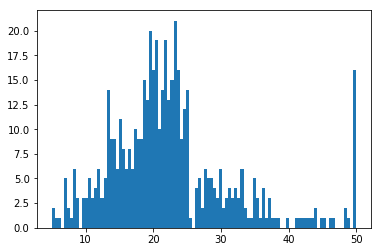

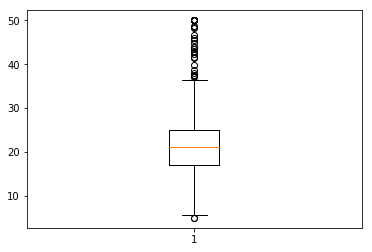

In [11]:
plt.hist(target["TARGET"],bins = 100)
plt.show()
plt.boxplot(target["TARGET"])
plt.show()


# Initial Predicition with raw data

In [12]:
from sklearn.model_selection import train_test_split
 
# Split into training and testing datasets
# The random_state=0 kwarg ensures that the split is performed in a consistent manner between runs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
 
# Fit training set
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
 
 
# Prediction metric
naive_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(naive_rmse)

5.783658787280861


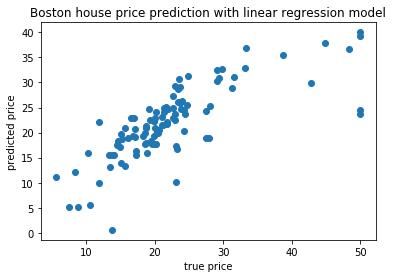

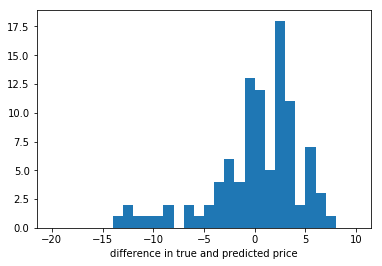

In [14]:
# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.title('Boston house price prediction with linear regression model')
plt.show()
 
# Distribution of errors
plt.hist(y_pred - y_test,bins = range(-20,11,1))
plt.xlabel('difference in true and predicted price')
plt.show()

# Feature Engineering

Attempts

- Remove outliers in target, values of 50
  - RMSE Improvement - 1.4568695846892066
-Add Standard Scaler
  - RMSE Improvement - 1.456869584689211 - Barely any improvement
-Replace Standard with MinMax Scaler
  - RMSE Improvement - 1.4568695846892137 - Barely any improvement, but best scaling
-Replace Standard with MaxAbs Scaler
  - RMSE Improvement - 1.456869584689212 - Worse than MinMax
-Add categorisation on CHAS feature
  - RMSE Improvement - 1.4568695847061575 - Improvement
  
- Loop through to remove features one by one
Removing CHAS and INDUS have a positive impact - Remove these two together leads to 4.304458421612283, improvement of 1.4792003656685777
Removing all other features has a negative impact individially
Removed Feature	New RMSE	Impact
CHAS	4.313259982	0.01352922015
INDUS	4.318445876	0.008343326533
AGE	    4.326751297	3.79E-05
ZN	    4.33557273	-0.008783527861
NOX	    4.3659072	-0.03911799755
B	    4.393902229	-0.06711302657
CRIM	4.405942413	-0.07915321079
RAD	    4.42633282	-0.09954361702
TAX	    4.447770195	-0.1209809927
DIS	    4.504328654	-0.1775394516
LSTAT	4.590714818	-0.2639256156
PTRATIO	4.705479732	-0.3786905294
RM	    4.985348228	-0.6585590251

- Remove CHAS and INDUS and the repeat process
Removed Feature	New RMSE	Impact
AGE	    4.306313597	-0.001855175676
ZN	    4.312388958	-0.00793053648
NOX	    4.345536505	-0.04107808292
B	    4.372303799	-0.06784537708
CRIM	4.383219661	-0.07876123917
RAD	    4.404340957	-0.09988253532
TAX	    4.440388143	-0.1359297214
DIS	    4.486801427	-0.1823430053
LSTAT	4.56257363	-0.2581152082
PTRATIO	4.709273147	-0.4048147255
RM	    4.982456124	-0.6779977027


In [15]:
 
def basic_train_and_run(X_train,X_test,y_train,y_test) :
# Split into training and testing datasets
# The random_state=0 kwarg ensures that the split is performed in a consistent manner between runs

    model = LinearRegression()
 
# Fit training set
    model.fit(X_train, y_train)

# Predict on test set
    y_pred = model.predict(X_test)
 
 
# Prediction metric
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return(y_pred,rmse)
    #return(rmse_improvement)


In [16]:
 
def lasso_train_and_run(X_train,X_test,y_train,y_test,alpha) :
# Split into training and testing datasets
# The random_state=0 kwarg ensures that the split is performed in a consistent manner between runs
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    model = Lasso(alpha=alpha)
 
# Fit training set
    model.fit(X_train, y_train)

# Predict on test set
    y_pred = model.predict(X_test)
 
 
# Prediction metric
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return(y_pred,rmse)
    #return(rmse_improvement)


In [17]:
 
def ridge_train_and_run(X_train,X_test,y_train,y_test,alpha) :
# Split into training and testing datasets
# The random_state=0 kwarg ensures that the split is performed in a consistent manner between runs
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    model = Ridge(alpha=alpha)
 
# Fit training set
    model.fit(X_train, y_train)

# Predict on test set
    y_pred = model.predict(X_test)
 
 
# Prediction metric
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return(y_pred,rmse)
    #return(rmse_improvement)


In [18]:
def model_performance (rmse,best_rmse,y_test,y_pred,  show_graphs):
    rmse_improvement =  best_rmse - rmse
    print("RMSE            : "+str(rmse))
    print("RMSE Improvement: "+str(rmse_improvement))
    if show_graphs == True :
        # Scatter plot
        plt.scatter(y_test, y_pred)
        plt.xlabel('true price')
        plt.ylabel('predicted price')
        plt.title('Boston house price prediction with linear regression model')
        plt.show()

        # Distribution of errors
        plt.hist(y_pred - y_test,bins = 100 )
        plt.xlabel('difference in true and predicted price')
        plt.show()

original model
RMSE            : 3.9063467357192536
RMSE Improvement: -4.440892098500626e-16


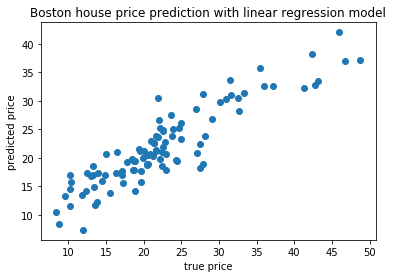

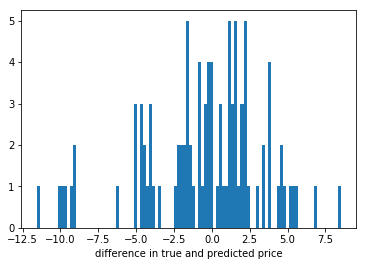

Lasso Model : Alpha = 0.001
RMSE            : 3.9155176410564336
RMSE Improvement: -0.009170905337180457


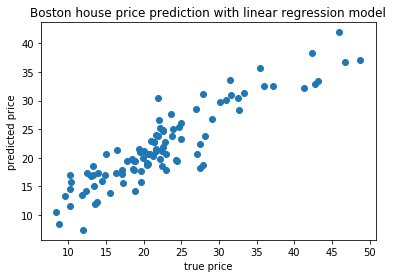

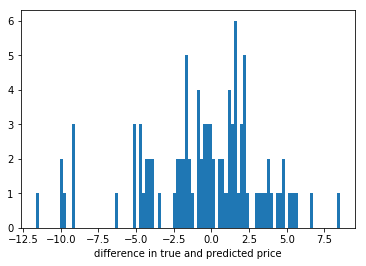

Lasso Model : Alpha = 0.003
RMSE            : 3.9366144140656227
RMSE Improvement: -0.030267678346369564


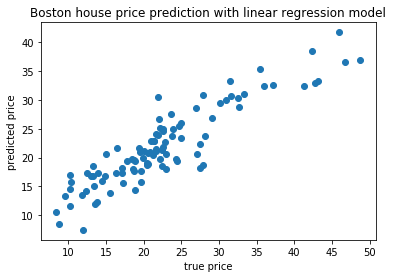

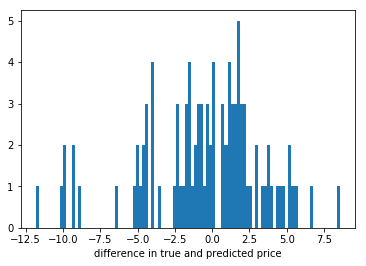

Lasso Model : Alpha = 0.01
RMSE            : 4.013661236156442
RMSE Improvement: -0.10731450043718871


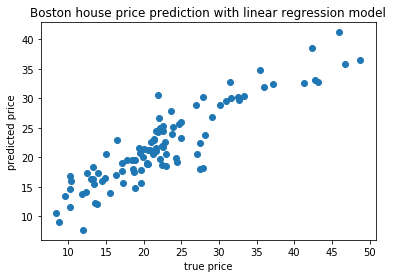

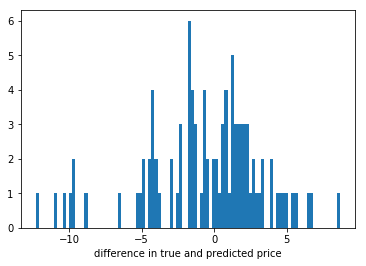

Lasso Model : Alpha = 0.03
RMSE            : 4.127348264823898
RMSE Improvement: -0.2210015291046452


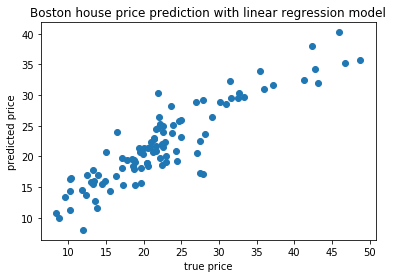

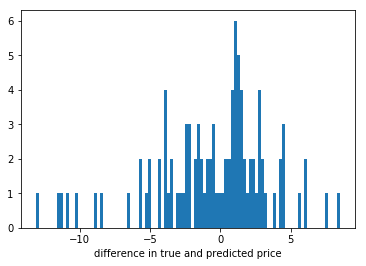

Lasso Model : Alpha = 0.1
RMSE            : 4.552493230293251
RMSE Improvement: -0.6461464945739981


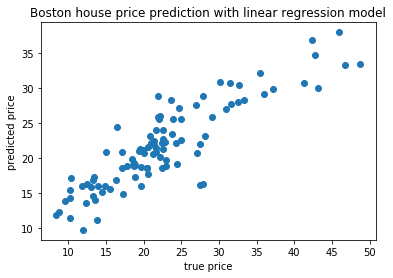

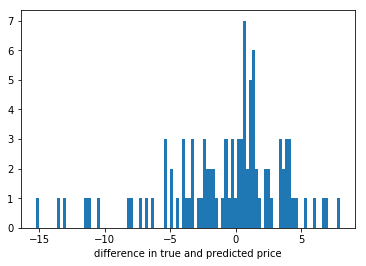

Lasso Model : Alpha = 0.3
RMSE            : 5.55299153007488
RMSE Improvement: -1.6466447943556264


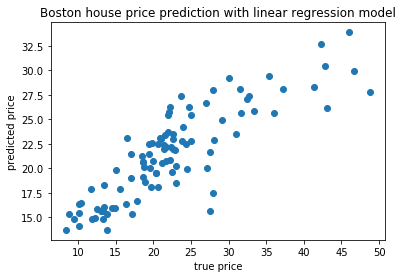

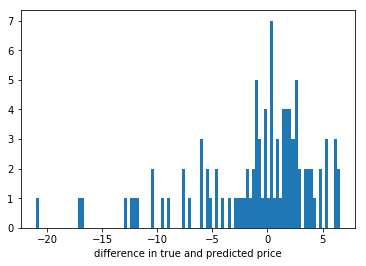

Lasso Model : Alpha = 1
RMSE            : 8.135910022620289
RMSE Improvement: -4.229563286901035


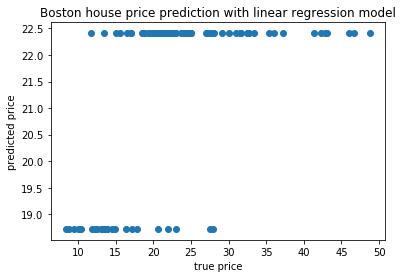

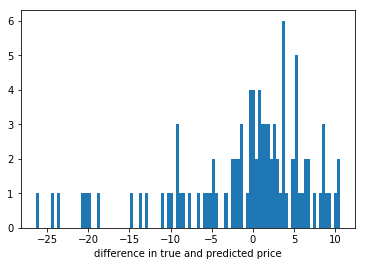

Lasso Model : Alpha = 3
RMSE            : 8.862563013453288
RMSE Improvement: -4.956216277734034


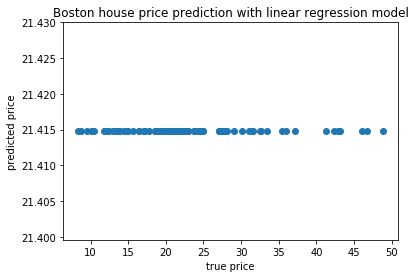

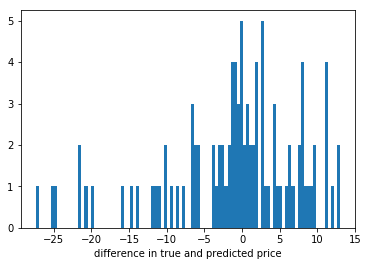

Lasso Model : Alpha = 10
RMSE            : 8.862563013453288
RMSE Improvement: -4.956216277734034


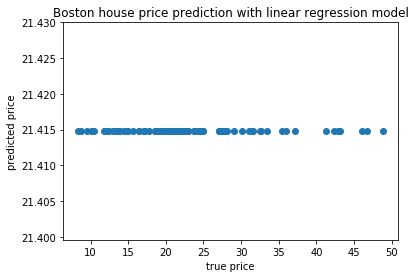

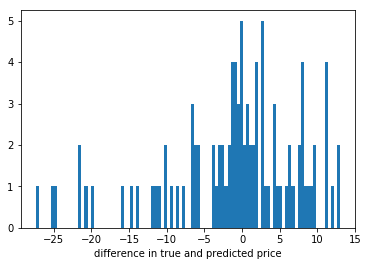

Ridge Model : Alpha = 0.001
RMSE            : 3.906566519972273
RMSE Improvement: -0.00021978425301982796


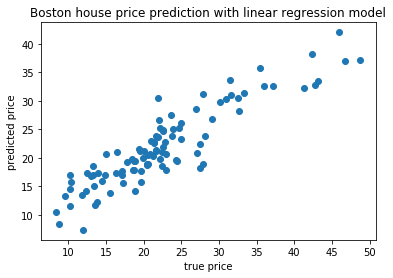

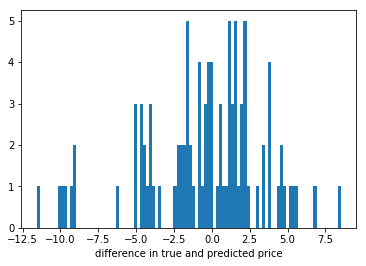

Ridge Model : Alpha = 0.003
RMSE            : 3.907005753607043
RMSE Improvement: -0.0006590178877896591


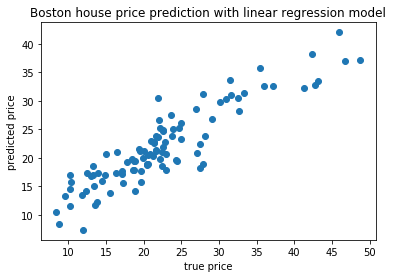

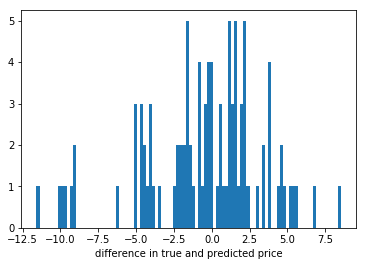

Ridge Model : Alpha = 0.01
RMSE            : 3.9085394793278185
RMSE Improvement: -0.0021927436085653618


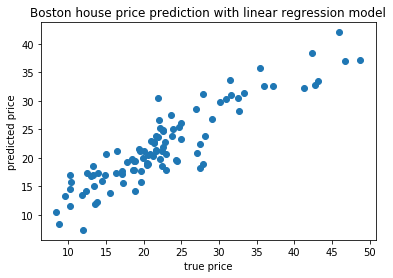

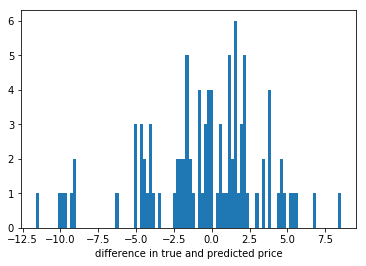

Ridge Model : Alpha = 0.03
RMSE            : 3.912889181365774
RMSE Improvement: -0.006542445646520623


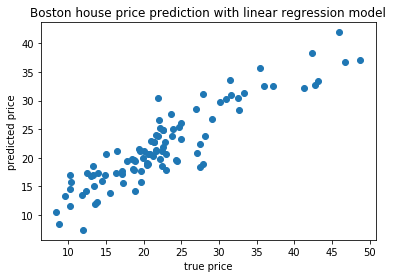

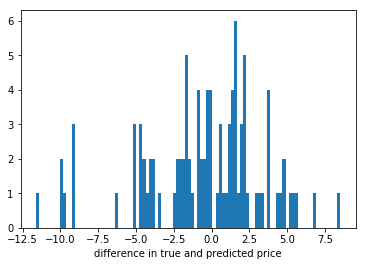

Ridge Model : Alpha = 0.1
RMSE            : 3.9277027200778853
RMSE Improvement: -0.021355984358632174


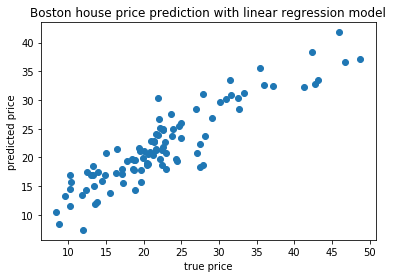

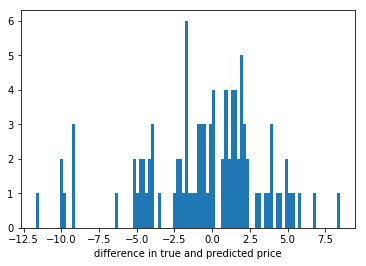

Ridge Model : Alpha = 0.3
RMSE            : 3.966678965172
RMSE Improvement: -0.060332229452746855


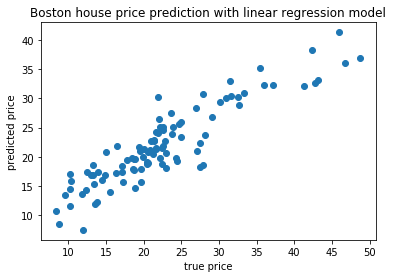

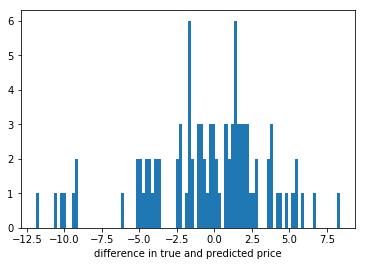

Ridge Model : Alpha = 1
RMSE            : 4.082671051119684
RMSE Improvement: -0.1763243154004308


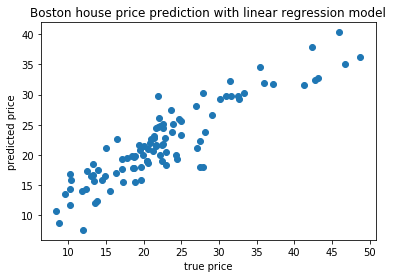

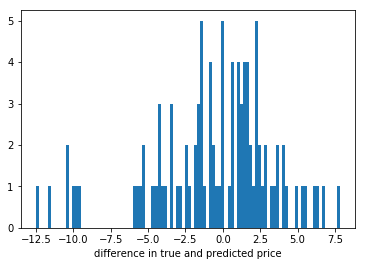

Ridge Model : Alpha = 3
RMSE            : 4.3739504520266355
RMSE Improvement: -0.4676037163073823


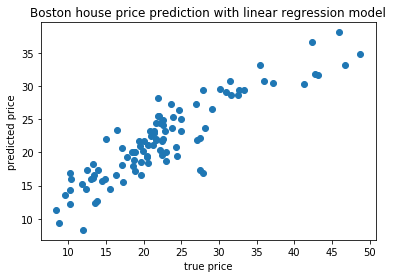

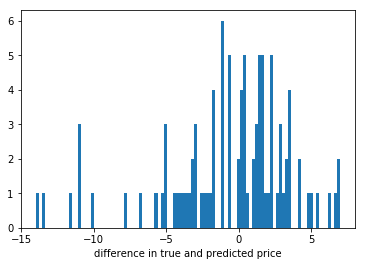

Ridge Model : Alpha = 10
RMSE            : 5.149172511529597
RMSE Improvement: -1.2428257758103443


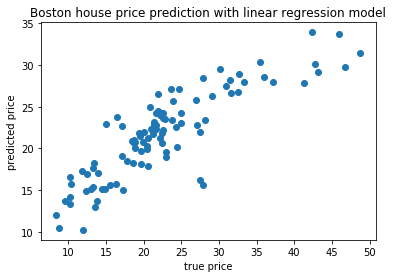

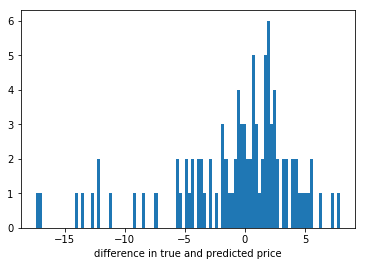

In [19]:
best_rmse = 3.906346735719253
y = boston.target
X = boston.data
data = pd.DataFrame(X, columns = boston.feature_names)

data['TARGET'] = target
#X_engineered_train = X_engineered_train.drop(columns =['CRIM'])
#y_engineered_train = y_engineered_train.drop(columns =['CRIM'])
#print(X_engineered_train)

from sklearn import preprocessing
import math


# the 50 values look like outliers to me
data.drop(data[data.TARGET == 50].index, inplace=True)

y = data.TARGET
X = data.drop(["TARGET","CHAS","INDUS","AGE"], axis = 1)


lstat = X["LSTAT"]
sqrtLSTAT = []
for i in lstat:
    sqrtLSTAT.append(i ** -0.6)
X["srtLSTAT"] = sqrtLSTAT
X = X.drop("LSTAT",axis=1)

rad = X["RAD"]
binaryRad = []
for i in rad:
    if i > 10:
        binaryRad.append(1)
    else:
        binaryRad.append(0)
X["binaryRAD"] = binaryRad


tax = X["TAX"]
binaryTax = []
for i in tax:
    if i > 500:
        binaryTax.append(1)
    else:
        binaryTax.append(0)
X["binaryTAX"] = binaryTax

b = X["B"]
binaryB = []
for i in b:
    if i > 335:
        binaryB.append(1)
    else:
        binaryB.append(0)
X["binaryB"] = binaryB

zn = X["ZN"]
binaryZN = []
for i in zn:
    if i > 20:
        binaryZN.append(1)
    else:
        binaryZN.append(0)
X["binaryZN"] = binaryZN

crime = X["CRIM"]
binaryCRIME = []
for i in crime:
    if i > 20:
        binaryCRIME.append(1)
    else:
        binaryCRIME.append(0)
X["binaryCRIME"] = binaryCRIME
X = X.drop("CRIM",axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

preprocessing.OneHotEncoder()

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_pred, rmse = basic_train_and_run(X_train, X_test, y_train, y_test)
print("original model")
model_performance(rmse,best_rmse, y_test,y_pred,True)

alphaVals = []
alphaVals = [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
for i in alphaVals:
    alpha = i
    print("Lasso Model : Alpha = "+str(alpha))
    y_pred, rmse = lasso_train_and_run(X_train, X_test, y_train, y_test,alpha)
    model_performance(rmse,best_rmse, y_test,y_pred,True)

for i in alphaVals:
    alpha = i
    print("Ridge Model : Alpha = "+str(alpha))
    y_pred, rmse = ridge_train_and_run(X_train, X_test, y_train, y_test,alpha)
    model_performance(rmse,best_rmse, y_test,y_pred,True)
#best score
#3.9063467357192536